<a href="https://colab.research.google.com/github/foofoofoo97/intelligence_kuih_muih_recognition_system/blob/main/model_3_cnn_(added_normalization_n_augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# view tensorflowe version
print(tf.__version__)

2.4.1


In [ ]:
# creation of the image dataset
# set batch size and image size
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# mounting google drive locally
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# get the directory of collected images for each kuih type (kelapa)
train_directory = '/content/drive/MyDrive/422_Asgn/train'
validation_directory = '/content/drive/MyDrive/422_Asgn/test'

In [ ]:
# import images dataset for training
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_directory,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 198 files belonging to 4 classes.


In [ ]:
# import images dataset for validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  validation_directory,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 48 files belonging to 4 classes.


In [ ]:
# get and view class names for training image dataset
class_names = train_ds.class_names
print(class_names)

['Biskut Kelapa', 'Kuih Ketayap', 'Onde Onde', 'Yi Bua']


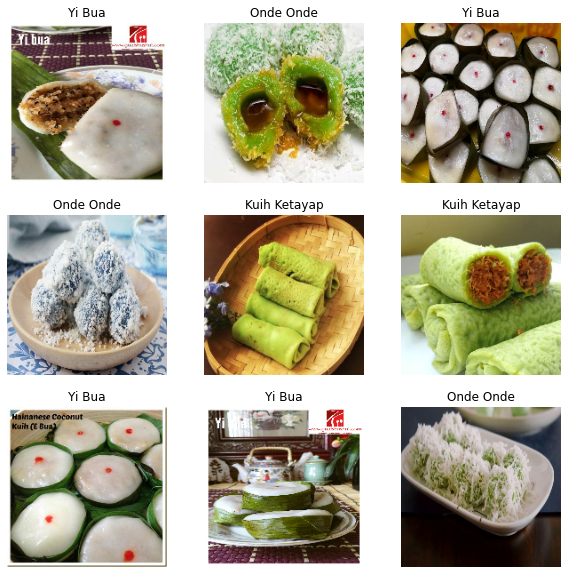

In [ ]:
# training image dataset visualization
import matplotlib.pyplot as plt

# label train images with its class names - types of kuih kelapa
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# to expand the training image dataset by creating modified version of exiting images in the dataset
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

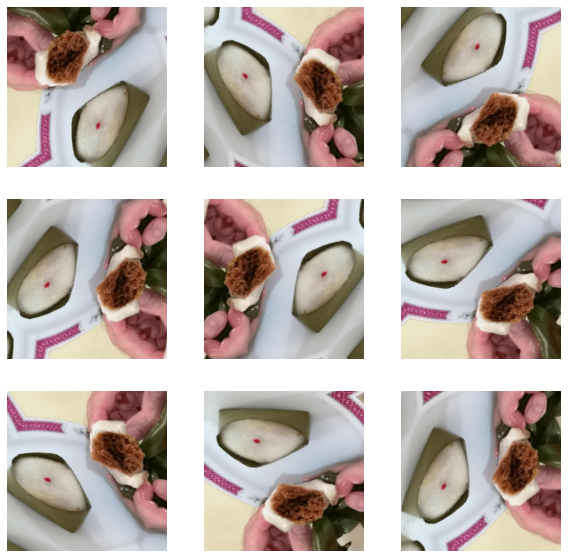

In [ ]:
# view augmented images from training image dataset
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
# view tensor of the shape - a batch of images and labels
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
# data standardization
from tensorflow.keras import layers
# standardize input values using a Rescaling layer
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
# apply the Rescaling layer to the training image dataset by calling map
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# the pixels values are now in '[0,1]'
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [ ]:
# data configuration for performance
AUTOTUNE = tf.data.AUTOTUNE
# to prevent bottleneck during model training
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# designing the model with 
# 3 convolutional layers each with 32 filters and kernel size of 3
# 3 max pool layer and
# a fully-connected dense layer with 128 nodes

num_classes = 4 # four types of kuih kelapa

model = tf.keras.Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
# compiling the model with adam optimizer
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
# training the model with 20 epochs
epochs = 20
model3 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
7/7 [==============================] - 22s 3s/step - loss: 1.8840 - accuracy: 0.2045 - val_loss: 1.3613 - val_accuracy: 0.2500
Epoch 2/20
7/7 [==============================] - 8s 1s/step - loss: 1.3537 - accuracy: 0.2769 - val_loss: 1.2814 - val_accuracy: 0.4375
Epoch 3/20
7/7 [==============================] - 7s 1s/step - loss: 1.2707 - accuracy: 0.3702 - val_loss: 1.1088 - val_accuracy: 0.5208
Epoch 4/20
7/7 [==============================] - 8s 1s/step - loss: 1.1212 - accuracy: 0.4570 - val_loss: 1.0271 - val_accuracy: 0.4583
Epoch 5/20
7/7 [==============================] - 8s 1s/step - loss: 1.0432 - accuracy: 0.4523 - val_loss: 1.0395 - val_accuracy: 0.4583
Epoch 6/20
7/7 [==============================] - 8s 1s/step - loss: 1.1008 - accuracy: 0.4606 - val_loss: 1.0308 - val_accuracy: 0.4583
Epoch 7/20
7/7 [==============================] - 8s 1s/step - loss: 1.1029 - accuracy: 0.4510 - val_loss: 0.9562 - val_accuracy: 0.6250
Epoch 8/20
7/7 [========================

In [ ]:
# testing the model with a randomly chosen image of kuih kelapa
img = keras.preprocessing.image.load_img("/content/drive/MyDrive/422_Asgn/yibua.jpeg", target_size=(180,180))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # to create batch axis

# output of the model's prediction
predictions = model.predict(img_array)
score = predictions[0]
print("Test Result:")
print(class_names[np.argmax(predictions)])


Test Result:
Yi Bua


In [ ]:
# testing the model with a randomly chosen image of kuih kelapa
img = keras.preprocessing.image.load_img("/content/drive/MyDrive/422_Asgn/biskutkelapa.jpeg", target_size=(180,180))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # to create batch axis

# output of the model's prediction
predictions = model.predict(img_array)
score = predictions[0]
print("Test Result:")
print(class_names[np.argmax(predictions)])

Test Result:
Biskut Kelapa


In [ ]:
# testing the model with a randomly chosen image of kuih kelapa
img = keras.preprocessing.image.load_img("/content/drive/MyDrive/422_Asgn/kuihketayap.jpeg", target_size=(180,180))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # to create batch axis

# output of the model's prediction
predictions = model.predict(img_array)
score = predictions[0]
print("Test Result:")
print(class_names[np.argmax(predictions)])

Test Result:
Kuih Ketayap


In [ ]:
# testing the model with a randomly chosen image of kuih kelapa
img = keras.preprocessing.image.load_img("/content/drive/MyDrive/422_Asgn/ondeonde.jpeg", target_size=(180,180))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # to create batch axis

# output of the model's prediction
predictions = model.predict(img_array)
score = predictions[0]
print("Test Result:")
print(class_names[np.argmax(predictions)])

Test Result:
Onde Onde


In [ ]:
# evaluates the model using training image dataset
score = model.evaluate(train_ds, verbose=1)

# output the model's performance based on the training image dataset
print('Train loss:', score[0])
print('Train accuracy:', score[1])

7/7 [==============================] - 2s 241ms/step - loss: 0.3156 - accuracy: 0.8939
Train loss: 0.31561052799224854
Train accuracy: 0.8939393758773804


In [ ]:
# evaluates the model using testing image dataset
score = model.evaluate(val_ds, verbose=1)

# output the model's performance based on the testing image dataset
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

2/2 [==============================] - 0s 148ms/step - loss: 0.5967 - accuracy: 0.8750
Validation loss: 0.596703052520752
Validation accuracy: 0.875


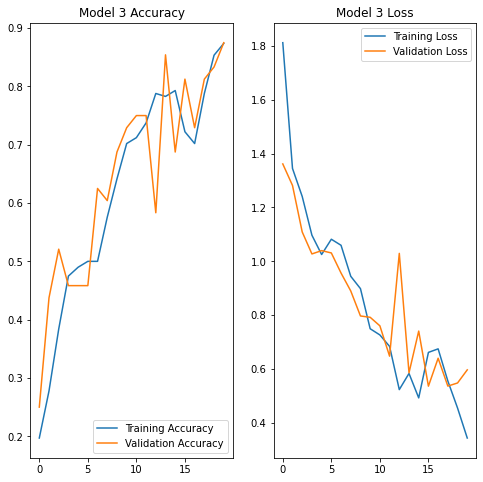

In [ ]:
# to visualize the results of training the model
acc = model3.history['accuracy']
val_acc = model3.history['val_accuracy']

loss = model3.history['loss']
val_loss = model3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Model 3 Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Model 3 Loss')
plt.show()

In [ ]:
# save the model
model.save_weights("model3.h5")